In [28]:
#import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [29]:
#import dataset
dataset = pd.read_csv("data/google.csv")

In [30]:
dataset.describe()

,High,Low,Open,Close,Volume,Adj Close
count,4317.000000,4317.000000,4317.000000,4317.000000,4.317000e+03,4317.000000
mean,639.682936,627.615621,633.603748,633.852357,6.523837e+06,633.852357
std,561.783142,552.069438,556.527532,557.255541,7.830526e+06,557.255541
min,50.680038,47.800831,49.409801,49.818268,7.922000e+03,49.818268
25%,247.507278,241.469910,244.832306,244.334183,1.593563e+06,244.334183
50%,401.988251,395.168823,399.004425,398.561096,3.851583e+06,398.561096
75%,933.440002,923.030029,929.059998,928.799988,8.268878e+06,928.799988
max,2936.409912,2912.290039,2918.989990,2916.840088,8.254163e+07,2916.840088


In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4317 non-null   object 
 1   High       4317 non-null   float64
 2   Low        4317 non-null   float64
 3   Open       4317 non-null   float64
 4   Close      4317 non-null   float64
 5   Volume     4317 non-null   float64
 6   Adj Close  4317 non-null   float64
dtypes: float64(6), object(1)
memory usage: 236.2+ KB


In [32]:
dataset.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
1,2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2,2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
3,2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
4,2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [33]:
#scale values to range 0-1
trainset = dataset.iloc[:, 3:4].values
scaler = MinMaxScaler(feature_range = (0,1))
data_scaled = scaler.fit_transform(trainset)
data_scaled

array([[1.40608776e-04],
       [3.15935047e-04],
       [2.00670999e-03],
       ...,
       [9.50609507e-01],
       [9.57878900e-01],
       [9.57140076e-01]])

In [34]:
#split dataset to train and test sets
x_train = []
y_train = []
window = 70

for i in range(window, 3500):
    x_train.append(data_scaled[i-window:i, 0])
    y_train.append(data_scaled[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_test = []
y_test = []
for i in range(3501, 4300):
    x_test.append(data_scaled[i-window:i, 0])
    y_test.append(data_scaled[i,0])
    
x_test, y_test = np.array(x_test), np.array(y_test)

In [35]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [36]:
#build LSTM neural network model
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

/home/michal/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
#train model
regressor.fit(x_train, y_train,epochs = 10, batch_size = 32)

Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0043
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 3.0850e-04
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 2.7485e-04
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 2.7027e-04
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 2.8102e-04
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 3.4473e-04
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 2.1322e-04
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 1.7461e-04
Epoch 9/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 2.2086e-04
Epoch 10/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 1.7298e-04


In [38]:
#generate prices for test data
predicted_price = regressor.predict(x_test)
predicted_price = scaler.inverse_transform(predicted_price)
predicted_price

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


array([[1138.2131],
       [1139.378 ],
       [1141.3494],
       [1144.0652],
       [1147.3948],
       [1151.1493],
       [1155.4136],
       [1160.2383],
       [1165.6543],
       [1171.7025],
       [1178.2178],
       [1184.9191],
       [1191.5342],
       [1197.7524],
       [1203.3918],
       [1208.345 ],
       [1212.6105],
       [1216.2522],
       [1219.3932],
       [1222.1371],
       [1224.5444],
       [1226.6448],
       [1228.433 ],
       [1229.882 ],
       [1230.8907],
       [1231.3766],
       [1231.3116],
       [1230.6892],
       [1229.5636],
       [1228.0327],
       [1226.2786],
       [1224.5404],
       [1223.0226],
       [1221.8928],
       [1221.2245],
       [1220.9143],
       [1220.7623],
       [1220.5397],
       [1219.9613],
       [1218.8453],
       [1217.0782],
       [1214.6685],
       [1211.7002],
       [1208.3328],
       [1204.7189],
       [1200.9552],
       [1197.1433],
       [1193.4337],
       [1190.0151],
       [1186.9304],


In [39]:
#get real price for comparison
real_price =  scaler.inverse_transform(y_test.reshape(-1, 1))
real_price

array([[1172.2199707 ],
       [1196.56005859],
       [1191.        ],
       [1186.95996094],
       [1181.01000977],
       [1262.58996582],
       [1239.13000488],
       [1251.        ],
       [1271.        ],
       [1228.01000977],
       [1220.01000977],
       [1228.        ],
       [1205.90002441],
       [1229.61999512],
       [1225.        ],
       [1237.        ],
       [1240.4699707 ],
       [1249.90002441],
       [1243.        ],
       [1236.97998047],
       [1235.18994141],
       [1229.26000977],
       [1224.72998047],
       [1202.0300293 ],
       [1205.02001953],
       [1208.        ],
       [1200.        ],
       [1207.14001465],
       [1208.81994629],
       [1227.59997559],
       [1241.29003906],
       [1237.44995117],
       [1244.22998047],
       [1234.97998047],
       [1204.27001953],
       [1193.80004883],
       [1186.30004883],
       [1158.67004395],
       [1172.18994141],
       [1161.63000488],
       [1172.7199707 ],
       [1170.739

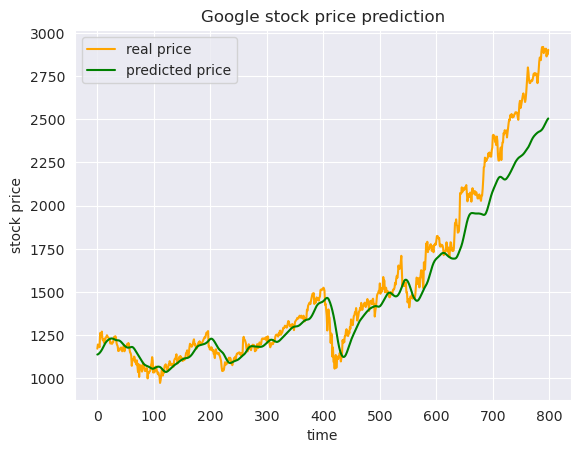

In [40]:
#plot predicted and real price
plt.plot(real_price, color = 'orange', label = 'real price')
plt.plot(predicted_price, color = 'green', label = 'predicted price')
plt.title('Google stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [41]:
#metrics
print(f'RMSE {metrics.mean_squared_error(predicted_price, real_price, squared=False)}')
print(f'MAE {metrics.mean_absolute_error(predicted_price, real_price)}')

RMSE 143.15342845702776
MAE 96.24813128532247


/home/michal/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
